In [1]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Assuming 'data.csv' is your file name, change it to your actual file name
songs = pd.read_csv('/content/drive/MyDrive/Emotion based music detection/data_moods.csv')


In [3]:
songs.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [5]:
songs = songs[['name','artist','mood','popularity']]
songs.head(7)

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60
5,A Burden to Bear,Emmanuelle Rimbaud,Calm,27
6,A La Plage,Ron Adelaar,Calm,29


In [6]:
songs["mood"].value_counts()

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

In [7]:
songs["popularity"].value_counts()

0     92
51    23
52    22
50    21
55    21
      ..
80     1
2      1
14     1
15     1
88     1
Name: popularity, Length: 83, dtype: int64

In [17]:
Emotion_Classes = ['Angry',
                  'Disgust',
                  'Fear',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

In [49]:
def recommend_songs(pred_class):
    if pred_class == 'Disgust':
        disgust_recommendations = songs[songs['mood'] == 'Sad']
        disgust_recommendations = disgust_recommendations.sort_values(by="popularity", ascending=False)
        display(disgust_recommendations[:5].reset_index(drop=True))

    if pred_class == 'Happy' or pred_class == 'Sad':
        happy_sad_recommendations = songs[songs['mood']=='Happy']
        happy_sad_recommendations = happy_sad_recommendations.sort_values(by="popularity", ascending=False)
        display(happy_sad_recommendations[:5].reset_index(drop=True))

    if pred_class == 'Fear' or pred_class == 'Angry' or pred_class == 'Calm':
        fear_angry_calm_recommendations = songs[songs['mood'] == 'Calm']
        fear_angry_calm_recommendations = fear_angry_calm_recommendations.sort_values(by="popularity", ascending=False)
        display(fear_angry_calm_recommendations[:5].reset_index(drop=True))

    if pred_class == 'Surprise' or pred_class == 'Neutral':
        surprise_neutral_recommendations = songs[songs['mood'] == 'Energetic']
        surprise_neutral_recommendations = surprise_neutral_recommendations.sort_values(by="popularity", ascending=False)
        display(surprise_neutral_recommendations[:5].reset_index(drop=True))


In [10]:
!pip install opencv-python

In [14]:
from tensorflow.keras.models import load_model

# Assuming your model is stored in a folder named 'models' and the filename is 'resnet_model.h5'
model_path = '/content/drive/MyDrive/Emotion based music detection/ResNet50V2Model.h5'

# Load the model
ResNet50V2_Model = load_model(model_path)



In [46]:
import cv2
import urllib.request

def load_and_preprocess_image(filename, img_shape=224, default_img_shape=128):
    # Download the Haar Cascade classifier XML file if not downloaded already
    url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
    try:
        # Try to load the XML file
        faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    except:
        # If the file is not found, download it
        urllib.request.urlretrieve(url, "haarcascade_frontalface_default.xml")
        faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

    # Load the image using OpenCV
    img = cv2.imread(filename)
    # Convert grayscale to RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray_img, 1.1, 4)

    if len(faces) == 0:
        # If no faces are detected, reduce the image size and display
        resized_img = cv2.resize(img, (default_img_shape, default_img_shape))
        normalized_img = resized_img / 255.
        return normalized_img

    for x, y, w, h in faces:
        roi_img = img[y:y + h, x:x + w]
        roi_resized_img = cv2.resize(roi_img, (img_shape, img_shape))
        roi_normalized_img = roi_resized_img / 255.
        return roi_normalized_img

    return None  # Handle cases where no faces are detected but not expected


In [47]:
def predict_and_plot(filename, class_names):
    # Import the target image and preprocess it
    img = load_and_preprocess_image(filename)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Display the image on the first subplot
    ax1.imshow(img)
    ax1.axis('off')  # Hide axis for the image
    ax1.set_title('Input Image')

    # Make a prediction
    pred = ResNet50V2_Model.predict(np.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[pred.argmax()]

    # Plot the predicted class on the second subplot
    ax2.text(0.5, 0.5, f"Prediction: {pred_class}", ha='center', va='center', fontsize=15)
    ax2.axis(False)  # Hide axis for the prediction plot
    ax2.set_title('Prediction')

    # Recommend songs based on the predicted class
    recommend_songs(pred_class)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


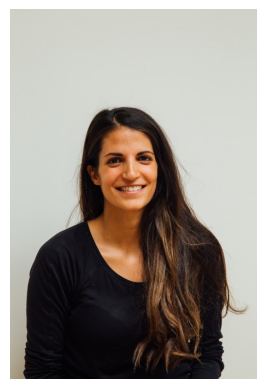

In [35]:
import matplotlib.pyplot as plt
import cv2

# Define the file path
file_path = "/content/drive/MyDrive/Emotion based music detection/Test Images/Happy.jpg"

# Load the image using OpenCV
img = cv2.imread(file_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


1/1 [==============================] - 0s 112ms/step


,name,artist,mood,popularity
0,Pumped Up Kicks,Foster The People,Happy,84
1,Africa,TOTO,Happy,84
2,Take on Me,a-ha,Happy,84
3,Highway to Hell,AC/DC,Happy,83
4,Here Comes The Sun - Remastered 2009,The Beatles,Happy,83


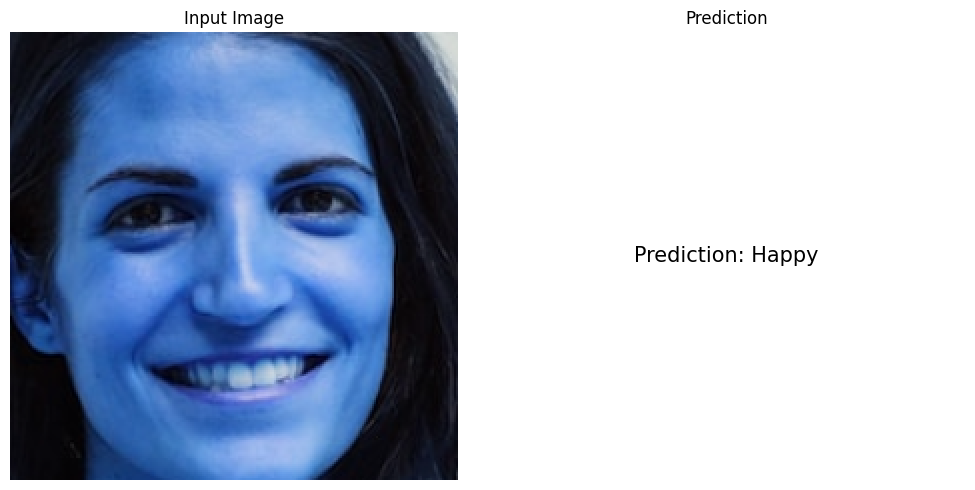

In [50]:
predict_and_plot("/content/drive/MyDrive/Emotion based music detection/Test Images/Happy.jpg", Emotion_Classes)

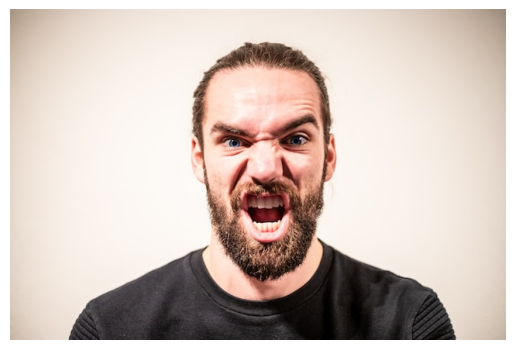

In [42]:
import matplotlib.pyplot as plt
import cv2

# Define the file path
file_path = "/content/drive/MyDrive/Emotion based music detection/Test Images/Angry.jpg"

# Load the image using OpenCV
img = cv2.imread(file_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


1/1 [==============================] - 0s 113ms/step


,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Curiosity,Beau Projet,Calm,60
2,Escaping Time,Benjamin Martins,Calm,60
3,Just Look at You,369,Calm,59
4,Vague,Amaranth Cove,Calm,59


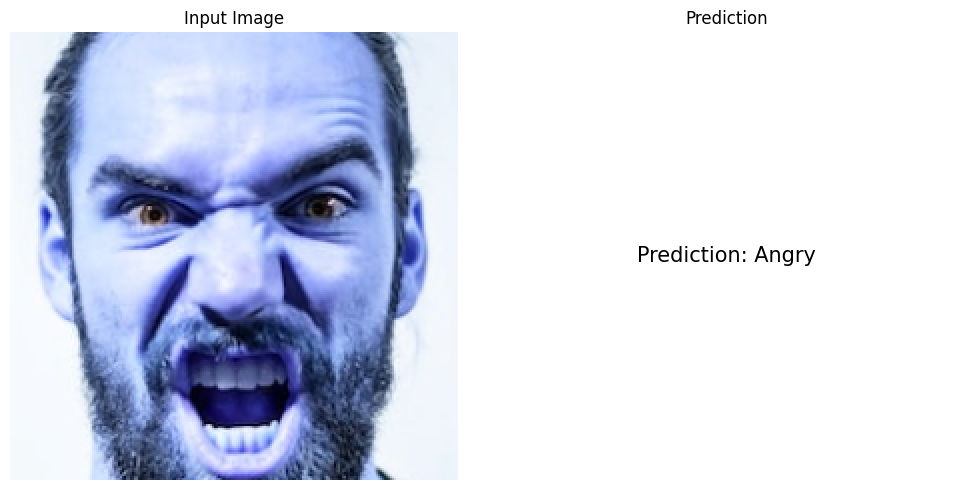

In [43]:
predict_and_plot("/content/drive/MyDrive/Emotion based music detection/Test Images/Angry.jpg", Emotion_Classes)

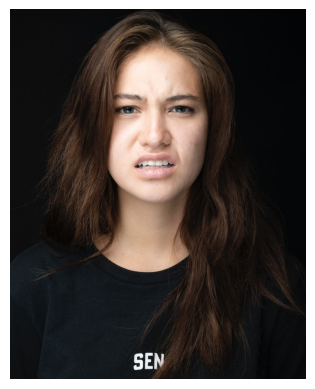

In [53]:
import matplotlib.pyplot as plt
import cv2

# Define the file path
file_path = "/content/drive/MyDrive/Emotion based music detection/Test Images/Disgust.jpg"

# Load the image using OpenCV
img = cv2.imread(file_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


1/1 [==============================] - 0s 113ms/step


,name,artist,mood,popularity
0,lovely (with Khalid),Billie Eilish,Sad,88
1,you broke me first,Tate McRae,Sad,87
2,when the party's over,Billie Eilish,Sad,87
3,Falling,Harry Styles,Sad,87
4,Before You Go,Lewis Capaldi,Sad,85


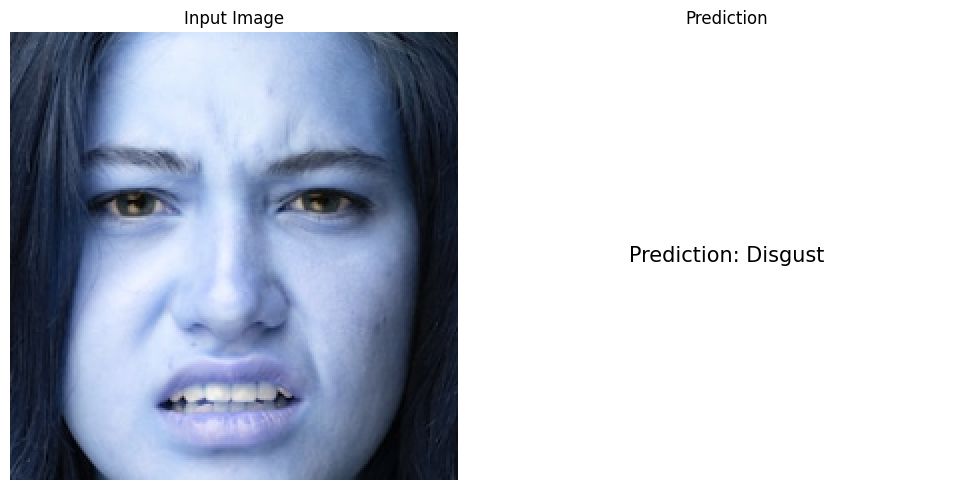

In [54]:
predict_and_plot("/content/drive/MyDrive/Emotion based music detection/Test Images/Disgust.jpg", Emotion_Classes)

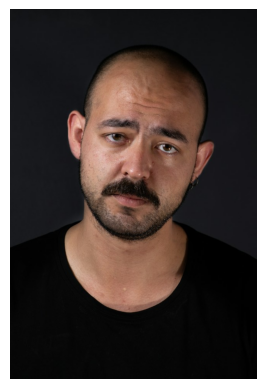

In [55]:
import matplotlib.pyplot as plt
import cv2

# Define the file path
file_path = "/content/drive/MyDrive/Emotion based music detection/Test Images/Sad.jpg"

# Load the image using OpenCV
img = cv2.imread(file_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


1/1 [==============================] - 0s 108ms/step


,name,artist,mood,popularity
0,Chop Suey!,System Of A Down,Energetic,79
1,Killing In The Name,Rage Against The Machine,Energetic,78
2,Dani California,Red Hot Chili Peppers,Energetic,77
3,Duality,Slipknot,Energetic,76
4,Uprising,Muse,Energetic,75


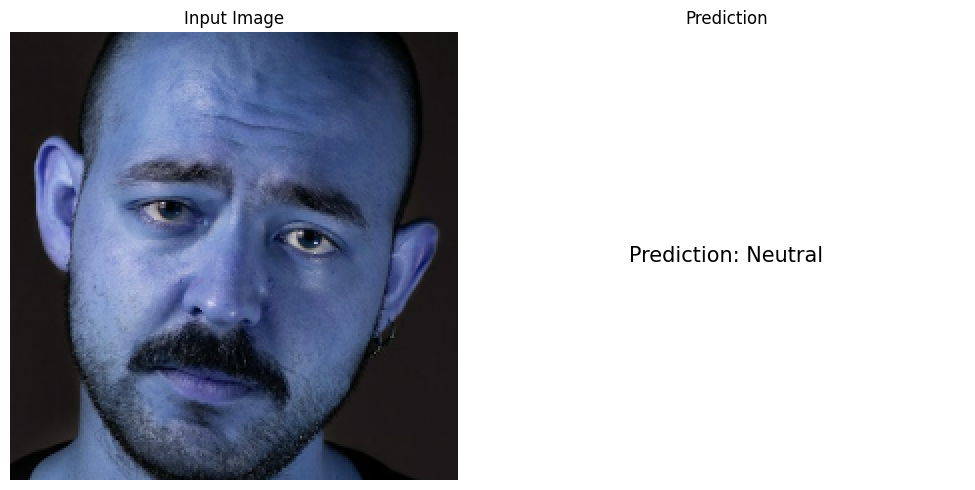

In [56]:
predict_and_plot("/content/drive/MyDrive/Emotion based music detection/Test Images/Sad.jpg", Emotion_Classes)

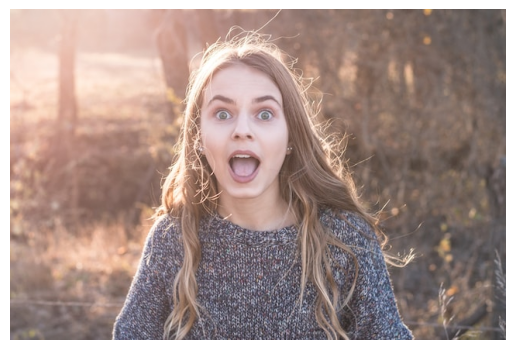

In [58]:
import matplotlib.pyplot as plt
import cv2

# Define the file path
file_path = "/content/drive/MyDrive/Emotion based music detection/Test Images/Surprise.jpg"

# Load the image using OpenCV
img = cv2.imread(file_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


1/1 [==============================] - 0s 122ms/step


,name,artist,mood,popularity
0,Chop Suey!,System Of A Down,Energetic,79
1,Killing In The Name,Rage Against The Machine,Energetic,78
2,Dani California,Red Hot Chili Peppers,Energetic,77
3,Duality,Slipknot,Energetic,76
4,Uprising,Muse,Energetic,75


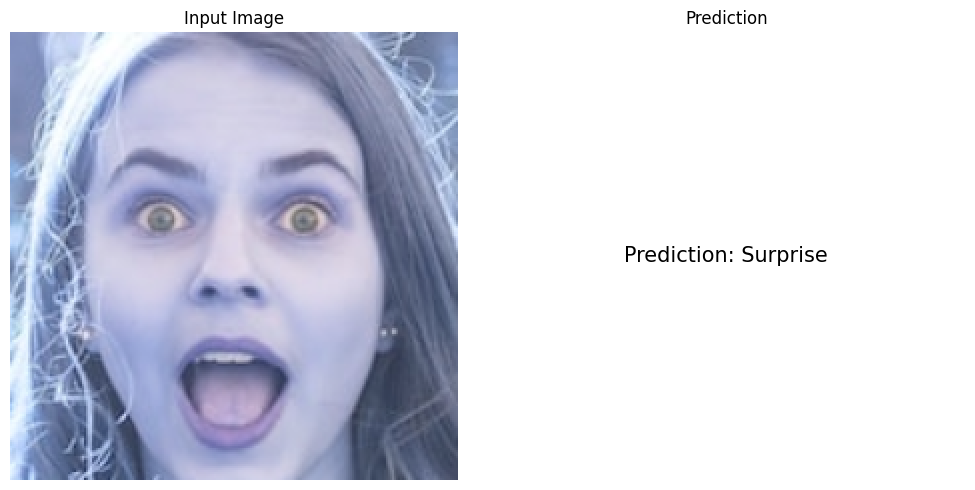

In [57]:
predict_and_plot("/content/drive/MyDrive/Emotion based music detection/Test Images/Surprise.jpg", Emotion_Classes)